In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('Adsorption_data.csv')
X = data.drop('Adorption Capacity(output)', axis=1).values
y = data['Adorption Capacity(output)'].values
data

,C(x1),H(x2),N(x3),Si(x4),BET(x5),Adorption Capacity(output)
0,12.8,1.16,0.38,7.51,8.75,0.144
1,6.5,0.57,0.04,3.34,3.69,0.334
2,8.7,0.54,0.21,40.98,33.37,0.452
3,3.5,0.35,0.12,22.05,7.55,0.333
4,7.2,0.71,0.03,3.16,1.97,0.383
5,9.7,0.98,0.34,58.88,58.00,0.366
6,10.9,0.74,0.32,6.07,46.00,0.544
7,2.5,0.32,0.17,28.01,22.00,0.436
8,58.6,2.10,0.38,0.38,38.03,1.160
9,69.1,1.77,0.86,0.53,111.00,2.400


In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=5, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)


In [7]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [20]:
epochs = 100
train_loss = []
val_loss = []
for epoch in range(epochs):
    running_train_loss = 0.0
    running_val_loss = 0.0
    

    model.train()
    optimizer.zero_grad()
    y_pred = model(torch.tensor(X_train, dtype=torch.float32))
    loss = criterion(y_pred, torch.tensor(y_train, dtype=torch.float32).reshape(-1,1))
    loss.backward()
    optimizer.step()
    running_train_loss += loss.item()
    

    model.eval()
    y_pred = model(torch.tensor(X_test, dtype=torch.float32))
    loss = criterion(y_pred, torch.tensor(y_test, dtype=torch.float32).reshape(-1,1))
    running_val_loss += loss.item()
    
    
    train_loss.append(running_train_loss)
    val_loss.append(running_val_loss)
    

    if epoch % 1 == 0:
        print(f"Epoch: {epoch+1}/{epochs}\tTrain Loss: {running_train_loss:.4f}\tValidation Loss: {running_val_loss:.4f}")


Epoch: 1/100	Train Loss: 0.2288	Validation Loss: 3.0353
Epoch: 2/100	Train Loss: 0.2266	Validation Loss: 3.0408
Epoch: 3/100	Train Loss: 0.2246	Validation Loss: 3.0486
Epoch: 4/100	Train Loss: 0.2224	Validation Loss: 3.0615
Epoch: 5/100	Train Loss: 0.2202	Validation Loss: 3.0782
Epoch: 6/100	Train Loss: 0.2183	Validation Loss: 3.0965
Epoch: 7/100	Train Loss: 0.2163	Validation Loss: 3.1115
Epoch: 8/100	Train Loss: 0.2140	Validation Loss: 3.1204
Epoch: 9/100	Train Loss: 0.2120	Validation Loss: 3.1266
Epoch: 10/100	Train Loss: 0.2099	Validation Loss: 3.1337
Epoch: 11/100	Train Loss: 0.2078	Validation Loss: 3.1419
Epoch: 12/100	Train Loss: 0.2059	Validation Loss: 3.1498
Epoch: 13/100	Train Loss: 0.2042	Validation Loss: 3.1625
Epoch: 14/100	Train Loss: 0.2019	Validation Loss: 3.1811
Epoch: 15/100	Train Loss: 0.2000	Validation Loss: 3.2004
Epoch: 16/100	Train Loss: 0.1982	Validation Loss: 3.2166
Epoch: 17/100	Train Loss: 0.1963	Validation Loss: 3.2261
Epoch: 18/100	Train Loss: 0.1944	Validat

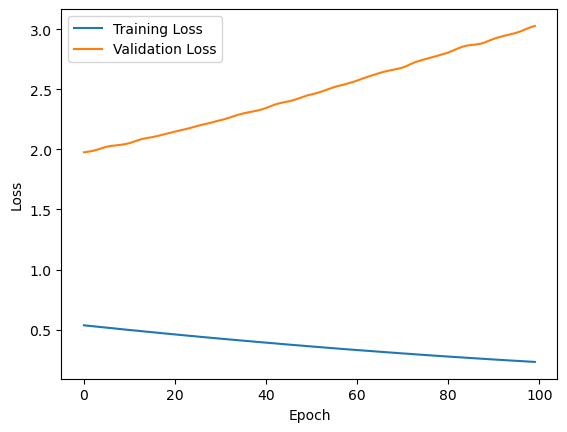

In [19]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


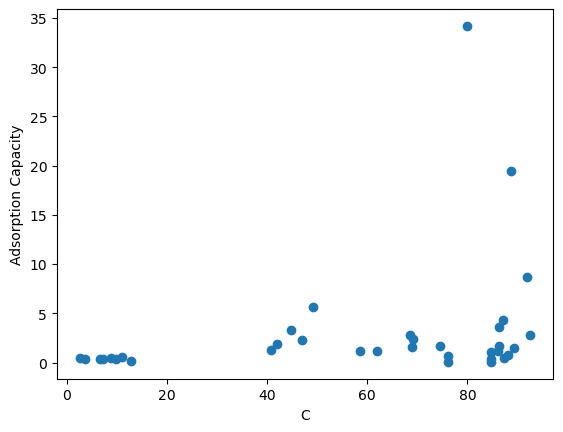

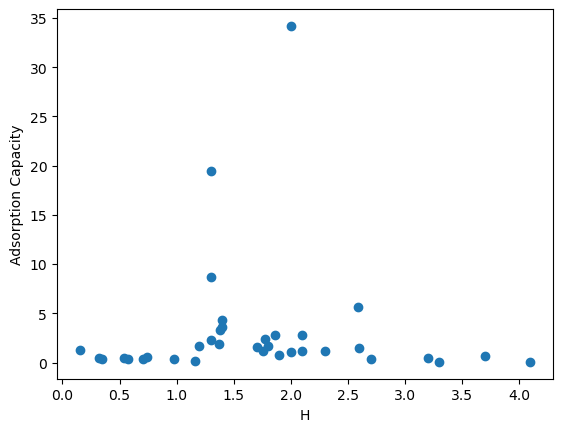

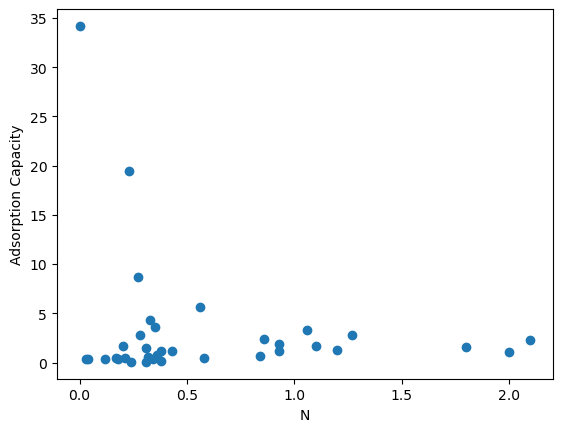

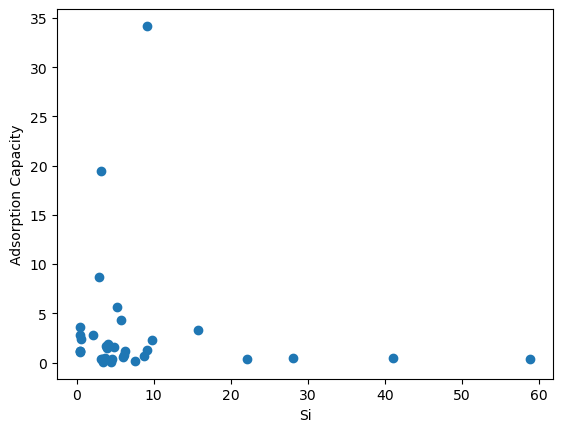

In [39]:
pl1 = data['C(x1)']
plt.scatter(pl1, y)
plt.xlabel('C')
plt.ylabel('Adsorption Capacity')
plt.show()

pl2 = data['H(x2)']
plt.scatter(pl2, y)
plt.xlabel('H')
plt.ylabel('Adsorption Capacity')
plt.show()

pl3 = data['N(x3)']
plt.scatter(pl3, y)
plt.xlabel('N')
plt.ylabel('Adsorption Capacity')
plt.show()

pl4 = data['Si(x4)']
plt.scatter(pl4, y)
plt.xlabel('Si')
plt.ylabel('Adsorption Capacity')
plt.show()